In [2]:
import os
# import drjit
gpu_num = 3 # Use "" to use the CPU
os.environ["CUDA_VISIBLE_DEVICES"] = f"{gpu_num}"
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import sionna
import tensorflow as tf
import pickle
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)
tf.get_logger().setLevel('ERROR')
# tf.config.run_functions_eagerly(True)

from jammer.simulation_model import *
from jammer.utils import *
import jammer.simulation_model as sim
from tensorflow.python.keras.losses import MeanAbsoluteError, MeanSquaredError, BinaryCrossentropy

## Time Domain Simulation

In [ ]:
data = {}

## 

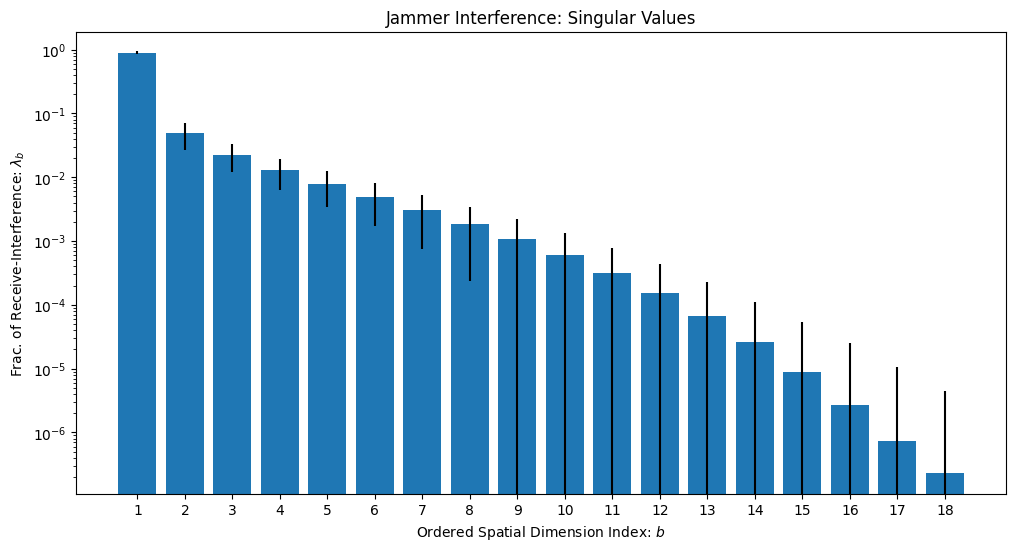

In [21]:
model_parameters = {}
jammer_parameters = {}
model_parameters["jammer_parameters"] = jammer_parameters

model_parameters["domain"] = "time"
model_parameters["jammer_present"] = True
model_parameters["jammer_power"] = db_to_linear(50.)
model_parameters["jammer_mitigation"] = "pos"
model_parameters["num_silent_pilot_symbols"] = 50
model_parameters["num_ofdm_symbols"] = 53
model_parameters["return_jammer_signals"] = True
model_parameters["num_ut"] = 1
model_parameters["num_ut_ant"] = 1
jammer_parameters["num_tx"] = 1
jammer_parameters["num_tx_ant"] = 1
#NR compliant
model_parameters["carrier_frequency"] = 3.5e9
model_parameters["fft_size"] = 667 # * 30kHz = 20MHz
model_parameters["cyclic_prefix_length"] = 47 # 667 * 144 / 2048
model_parameters["subcarrier_spacing"] = 30e3

ebno_db = 100.0
BATCH_SIZE = 1
name = "Multiple Jammers"

fig, ax = plt.subplots()
fig.set_size_inches(12, 6)

rel_svs = []
model = Model(**model_parameters)
for i in range(10000):
    if i % 100 == 0:
        print(i, end='\r')
    b, llr, jammer_signals = model(BATCH_SIZE, ebno_db)
    rel_svs.append(relative_singular_values(jammer_signals))
rel_svs = tf.stack(rel_svs)
mean = tf.reduce_mean(rel_svs, axis=0)
std = tf.math.reduce_std(rel_svs, axis=0)
data["no cp, NR"] = (mean, std)

#log scale
ax.set_yscale("log")

x_labels = np.arange(len(mean), dtype=np.int32) + 1
ax.bar(x_labels, mean, yerr=std)
ax.set_xticks(x_labels)
ax.set_ylabel(r"Frac. of Receive-Interference: $\lambda_b$")
ax.set_xlabel(r"Ordered Spatial Dimension Index: $b$")
ax.set_title("no cp, NR")
# ax.set_title("Jammer Interference: Singular Values")

plt.show()
with open("bers/report/singular_values.pickle", "wb") as f:
    pickle.dump(data, f)

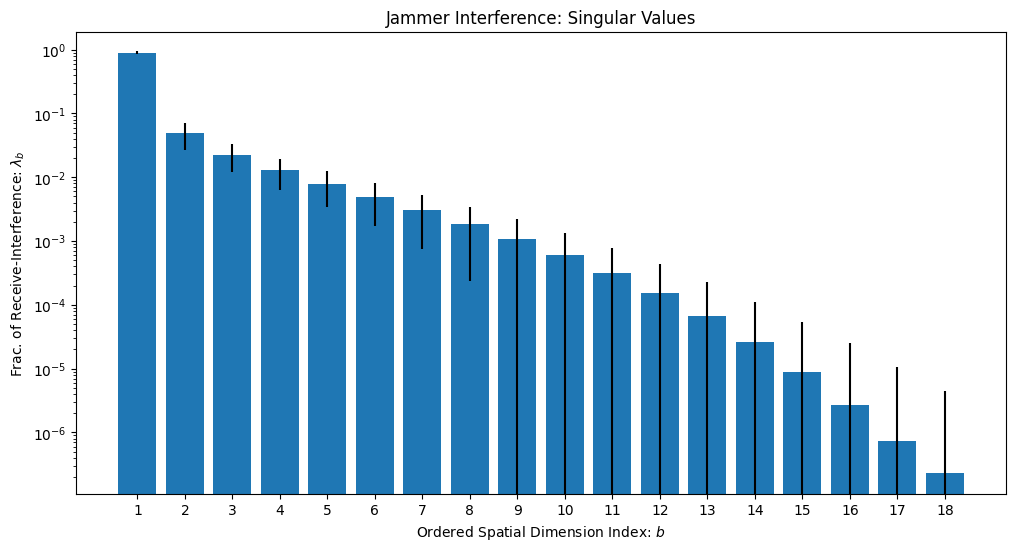

In [ ]:
model_parameters = {}
jammer_parameters = {}
model_parameters["jammer_parameters"] = jammer_parameters

model_parameters["domain"] = "time"
model_parameters["jammer_present"] = True
model_parameters["jammer_power"] = db_to_linear(50.)
model_parameters["jammer_mitigation"] = "pos"
model_parameters["num_silent_pilot_symbols"] = 50
model_parameters["num_ofdm_symbols"] = 53
model_parameters["return_jammer_signals"] = True
model_parameters["num_ut"] = 1
model_parameters["num_ut_ant"] = 1
jammer_parameters["num_tx"] = 1
jammer_parameters["num_tx_ant"] = 1
jammer_parameters["send_cyclic_prefix"] = True
#NR compliant
model_parameters["carrier_frequency"] = 3.5e9
model_parameters["fft_size"] = 667 # * 30kHz = 20MHz
model_parameters["cyclic_prefix_length"] = 47 # 667 * 144 / 2048
model_parameters["subcarrier_spacing"] = 30e3

ebno_db = 100.0
BATCH_SIZE = 1
name = "Multiple Jammers"

fig, ax = plt.subplots()
fig.set_size_inches(12, 6)

rel_svs = []
model = Model(**model_parameters)
for i in range(10000):
    if i % 100 == 0:
        print(i, end='\r')
    b, llr, jammer_signals = model(BATCH_SIZE, ebno_db)
    rel_svs.append(relative_singular_values(jammer_signals))
rel_svs = tf.stack(rel_svs)
mean = tf.reduce_mean(rel_svs, axis=0)
std = tf.math.reduce_std(rel_svs, axis=0)
data["cp, NR"] = (mean, std)

#log scale
ax.set_yscale("log")

x_labels = np.arange(len(mean), dtype=np.int32) + 1
ax.bar(x_labels, mean, yerr=std)
ax.set_xticks(x_labels)
ax.set_ylabel(r"Frac. of Receive-Interference: $\lambda_b$")
ax.set_xlabel(r"Ordered Spatial Dimension Index: $b$")
ax.set_title("cp, NR")
# ax.set_title("Jammer Interference: Singular Values")

plt.show()
with open("bers/report/singular_values.pickle", "wb") as f:
    pickle.dump(data, f)

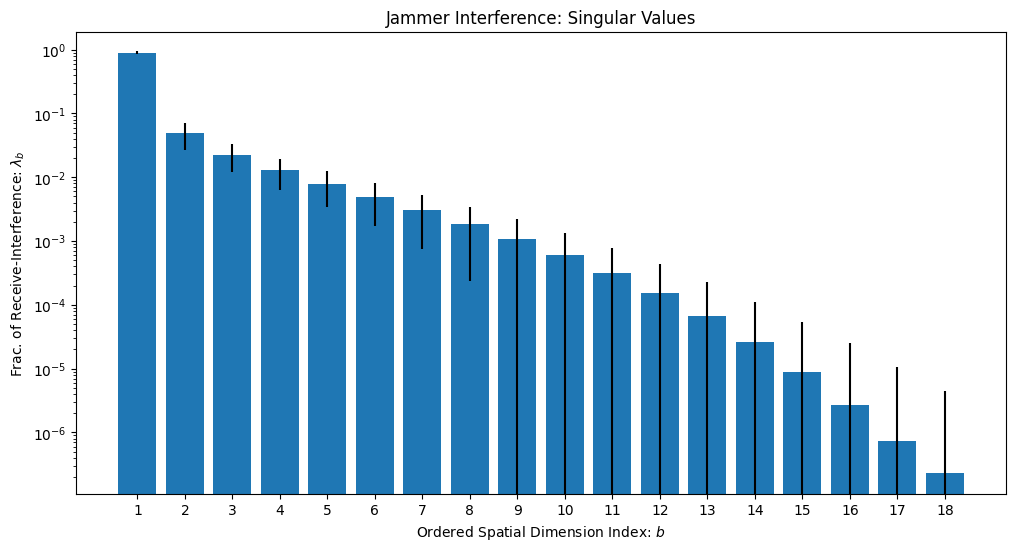

In [ ]:
model_parameters = {}
jammer_parameters = {}
model_parameters["jammer_parameters"] = jammer_parameters

model_parameters["domain"] = "time"
model_parameters["jammer_present"] = True
model_parameters["jammer_power"] = db_to_linear(50.)
model_parameters["jammer_mitigation"] = "pos"
model_parameters["num_silent_pilot_symbols"] = 50
model_parameters["num_ofdm_symbols"] = 53
model_parameters["return_jammer_signals"] = True
model_parameters["num_ut"] = 1
model_parameters["num_ut_ant"] = 1
jammer_parameters["num_tx"] = 1
jammer_parameters["num_tx_ant"] = 1
jammer_parameters["send_cyclic_prefix"] = True
#NR compliant
model_parameters["carrier_frequency"] = 3.5e9
model_parameters["fft_size"] = 667 # * 30kHz = 20MHz
model_parameters["cyclic_prefix_length"] = 210
model_parameters["subcarrier_spacing"] = 30e3

ebno_db = 100.0
BATCH_SIZE = 1
name = "Multiple Jammers"

fig, ax = plt.subplots()
fig.set_size_inches(12, 6)

rel_svs = []
model = Model(**model_parameters)
for i in range(10):
# for i in range(10000):
    if i % 100 == 0:
        print(i, end='\r')
    b, llr, jammer_signals = model(BATCH_SIZE, ebno_db)
    rel_svs.append(relative_singular_values(jammer_signals))
rel_svs = tf.stack(rel_svs)
mean = tf.reduce_mean(rel_svs, axis=0)
std = tf.math.reduce_std(rel_svs, axis=0)
data["long cp"] = (mean, std)

#log scale
ax.set_yscale("log")

x_labels = np.arange(len(mean), dtype=np.int32) + 1
ax.bar(x_labels, mean, yerr=std)
ax.set_xticks(x_labels)
ax.set_ylabel(r"Frac. of Receive-Interference: $\lambda_b$")
ax.set_xlabel(r"Ordered Spatial Dimension Index: $b$")
ax.set_title("long cp")
# ax.set_title("Jammer Interference: Singular Values")

plt.show()
with open("bers/report/singular_values.pickle", "wb") as f:
    pickle.dump(data, f)

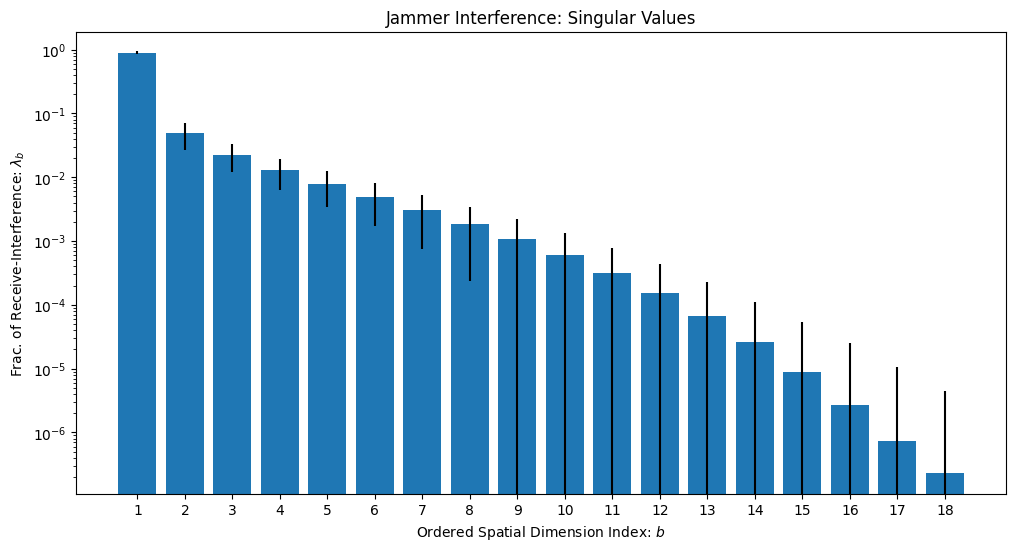

In [ ]:
model_parameters = {}
jammer_parameters = {}
model_parameters["jammer_parameters"] = jammer_parameters

model_parameters["domain"] = "time"
model_parameters["jammer_present"] = True
model_parameters["jammer_power"] = db_to_linear(50.)
model_parameters["jammer_mitigation"] = "pos"
model_parameters["num_silent_pilot_symbols"] = 50
model_parameters["num_ofdm_symbols"] = 53
model_parameters["return_jammer_signals"] = True
model_parameters["num_ut"] = 1
model_parameters["num_ut_ant"] = 1
jammer_parameters["num_tx"] = 1
jammer_parameters["num_tx_ant"] = 1
#NR compliant
model_parameters["carrier_frequency"] = 3.5e9
model_parameters["fft_size"] = 667 # * 30kHz = 20MHz
model_parameters["cyclic_prefix_length"] = 210
model_parameters["subcarrier_spacing"] = 30e3
model_parameters["scenario"] = "multitap_rayleigh"

ebno_db = 100.0
BATCH_SIZE = 1
name = "Multiple Jammers"

fig, ax = plt.subplots()
fig.set_size_inches(12, 6)

rel_svs = []
model = Model(**model_parameters)
for i in range(10):
# for i in range(10000):
    if i % 100 == 0:
        print(i, end='\r')
    b, llr, jammer_signals = model(BATCH_SIZE, ebno_db)
    rel_svs.append(relative_singular_values(jammer_signals))
rel_svs = tf.stack(rel_svs)
mean = tf.reduce_mean(rel_svs, axis=0)
std = tf.math.reduce_std(rel_svs, axis=0)
data["multitap, no cp"] = (mean, std)

#log scale
ax.set_yscale("log")

x_labels = np.arange(len(mean), dtype=np.int32) + 1
ax.bar(x_labels, mean, yerr=std)
ax.set_xticks(x_labels)
ax.set_ylabel(r"Frac. of Receive-Interference: $\lambda_b$")
ax.set_xlabel(r"Ordered Spatial Dimension Index: $b$")
ax.set_title("multitap, no cp")
# ax.set_title("Jammer Interference: Singular Values")

plt.show()
with open("bers/report/singular_values.pickle", "wb") as f:
    pickle.dump(data, f)

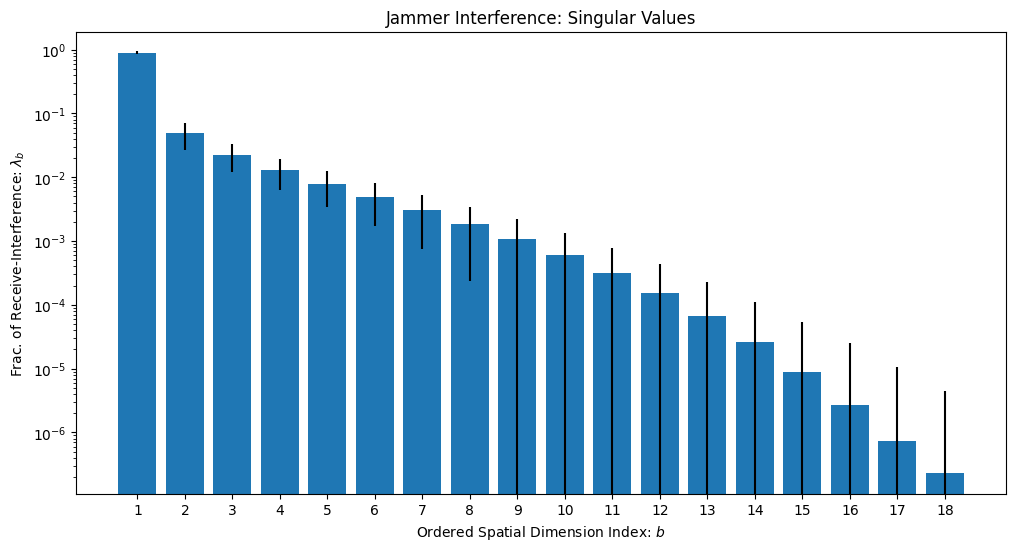

In [ ]:
model_parameters = {}
jammer_parameters = {}
model_parameters["jammer_parameters"] = jammer_parameters

model_parameters["domain"] = "time"
model_parameters["jammer_present"] = True
model_parameters["jammer_power"] = db_to_linear(50.)
model_parameters["jammer_mitigation"] = "pos"
model_parameters["num_silent_pilot_symbols"] = 50
model_parameters["num_ofdm_symbols"] = 53
model_parameters["return_jammer_signals"] = True
model_parameters["num_ut"] = 1
model_parameters["num_ut_ant"] = 1
jammer_parameters["num_tx"] = 1
jammer_parameters["num_tx_ant"] = 1
#NR compliant
model_parameters["carrier_frequency"] = 5e9
model_parameters["fft_size"] = 64 # * 30kHz = 20MHz
model_parameters["cyclic_prefix_length"] = 16
model_parameters["subcarrier_spacing"] = 312.5e3

ebno_db = 100.0
BATCH_SIZE = 1
name = "Multiple Jammers"

fig, ax = plt.subplots()
fig.set_size_inches(12, 6)

rel_svs = []
model = Model(**model_parameters)
for i in range(10):
# for i in range(10000):
    if i % 100 == 0:
        print(i, end='\r')
    b, llr, jammer_signals = model(BATCH_SIZE, ebno_db)
    rel_svs.append(relative_singular_values(jammer_signals))
rel_svs = tf.stack(rel_svs)
mean = tf.reduce_mean(rel_svs, axis=0)
std = tf.math.reduce_std(rel_svs, axis=0)
data["802.11"] = (mean, std)

#log scale
ax.set_yscale("log")

x_labels = np.arange(len(mean), dtype=np.int32) + 1
ax.bar(x_labels, mean, yerr=std)
ax.set_xticks(x_labels)
ax.set_ylabel(r"Frac. of Receive-Interference: $\lambda_b$")
ax.set_xlabel(r"Ordered Spatial Dimension Index: $b$")
ax.set_title("802.11")
# ax.set_title("Jammer Interference: Singular Values")

plt.show()
with open("bers/report/singular_values.pickle", "wb") as f:
    pickle.dump(data, f)